<a href="https://colab.research.google.com/github/mlindsey19/dxa/blob/master/dxadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Data was selected mulitple spreadsheets matching de-Identification number.
* Easy clinical mesuments along side dual energy X-ray absorptiometry (DXA).
* The puposed is to preditct the more expesive DXA test with simple clinical mesurements.
* Data was transposed to single speadshee and uploaded to CSV file on github.
* Measurements are muiltiple 4 or 5 visits per patient with new DXA data for each visit.

[data reference table](https://calerie.duke.edu/sites/calerie.duke.edu/files/calerie2_analysis_dataset_details_0.pdf)

In [57]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mlindsey19/dxa/master/dxadl.csv?token=AIP6LNNC6IQE3JXDC6PVBWC42OT4Y'

rdat = pd.read_csv(url)
rdat.head()


,deidnum visit,Unnamed: 1,mclinwt,height,mbmi,Unnamed: 5,deidnum visit.1,meanwst,meanumb,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,age,race,Unnamed: 20,deidnum visit.2,Unnamed: 22,TRUNKFAT,fm,ffm
0,60 SCR V1,NaN,77.6,173.90,25.66034891,NaN,903 Baseline,72.25,80.5,NaN,...,NaN,NaN,47.0,Black or African American,NaN,903 Baseline,NaN,7.367624579,18.52068867,40.77931133
1,231 SCR V1,NaN,78.9,177.80,24.95821318,NaN,903 BL Sub 1,72.25,80.5,NaN,...,NaN,NaN,26.0,White,NaN,903 BL Sub 1,NaN,7.367624579,18.52068867,40.77931133
2,596 SCR V1,NaN,70.2,177.20,22.35680182,NaN,1057 Baseline,72.25,82.5,NaN,...,NaN,NaN,32.0,White,NaN,1057 Baseline,NaN,7.916222507,18.44967646,33.20032355
3,823 SCR V1,NaN,65.3,153.10,27.8588253,NaN,1057 BL Sub 1,72.25,86,NaN,...,NaN,NaN,21.0,Black or African American,NaN,1057 BL Sub 1,NaN,8.032587724,18.58043726,33.21956274
4,867 SCR V1,NaN,71.8,179.15,22.37127927,NaN,1057 BL Sub 2,72.25,79,NaN,...,NaN,NaN,26.0,White,NaN,1057 BL Sub 2,NaN,7.799857291,18.31891565,33.18108435


Separate and extract data: 

Hight, Weight and BMI calculation

In [60]:
dat1 = pd.DataFrame()
dat1 = rdat.iloc[0: , [0,2,3,4]]
dat1.head()

,deidnum visit,mclinwt,height,mbmi
0,60 SCR V1,77.6,173.90,25.66034891
1,231 SCR V1,78.9,177.80,24.95821318
2,596 SCR V1,70.2,177.20,22.35680182
3,823 SCR V1,65.3,153.10,27.8588253
4,867 SCR V1,71.8,179.15,22.37127927


* Mean of the 2 closest natural waist measurements
* Mean of the 2 closest umbilical waist measurements

In [61]:
dat2 = pd.DataFrame()
dat2 = rdat.iloc[0: , 6 : 9]
dat2.head()

,deidnum visit.1,meanwst,meanumb
0,903 Baseline,72.25,80.5
1,903 BL Sub 1,72.25,80.5
2,1057 Baseline,72.25,82.5
3,1057 BL Sub 1,72.25,86
4,1057 BL Sub 2,72.25,79


* gender/age/race/ethinicy

In [62]:
dat3 = pd.DataFrame()
dat3 = rdat.iloc[0: , [11, 13, 14, 18, 19]]
dat3.head()

,deidnum,GENDER,ETHNIC,age,race
0,60.0,Male,Not Hispanic or Latino,47.0,Black or African American
1,231.0,Male,Not Hispanic or Latino,26.0,White
2,596.0,Male,Not Hispanic or Latino,32.0,White
3,823.0,Female,Unknown (not reporting ethnicity,21.0,Black or African American
4,867.0,Male,Not Hispanic or Latino,26.0,White


DXA (Dual-energy X-ray absorptiometry) is used to measure body composition: % body fat, fat mass (FM), fat free
mass (FFM), bone mineral density (BMD), bone mineral content (BMC).


In [63]:
dat4 = pd.DataFrame()
dat4 = rdat.iloc[0: , [21, 23, 24, 25]]
dat4.head()

,deidnum visit.2,TRUNKFAT,fm,ffm
0,903 Baseline,7.367624579,18.52068867,40.77931133
1,903 BL Sub 1,7.367624579,18.52068867,40.77931133
2,1057 Baseline,7.916222507,18.44967646,33.20032355
3,1057 BL Sub 1,8.032587724,18.58043726,33.21956274
4,1057 BL Sub 2,7.799857291,18.31891565,33.18108435


In [64]:
cdat = pd.DataFrame()
# merge data on combination of deidnum and visit (combined in speadsheet before upload to csv)
cdat = pd.merge(dat1, dat2, left_on='deidnum visit', right_on='deidnum visit.1')
cdat = pd.merge(cdat, dat4, left_on='deidnum visit', right_on='deidnum visit.2')
#slpit deiednum from vist for merge with demographics
new = cdat['deidnum visit.1'].str.split(n=1,expand=True)
cc= pd.concat([new, cdat], axis=1)
df = dat3.dropna(subset = ['deidnum'])
df.loc['deidnum'] = df['deidnum'].apply(int) #slice error disregaurd
cc[0] = cc[0].apply(int)
aa = pd.merge(cc, df, left_on=0, right_on='deidnum' )

aa = aa.drop(columns=['deidnum visit.2','deidnum visit.1', 'deidnum visit', 'deidnum']) 
#aa = aa.drop(columns=['ETHNIC']) 
bb = aa.drop(columns=[0, 1])

bb.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,mclinwt,height,mbmi,meanwst,meanumb,TRUNKFAT,fm,ffm,GENDER,ETHNIC,age,race
0,59.18333333,159.00,23.41020266,72.25,80.5,7.367624579,18.52068867,40.77931133,Female,Not Hispanic or Latino,27.0,White
1,59.18333333,159.00,23.41020266,72.25,80.5,7.367624579,18.52068867,40.77931133,Female,Not Hispanic or Latino,27.0,White
2,51.81666667,147.65,23.76854347,72.25,82.5,7.916222507,18.44967646,33.20032355,Female,Not Hispanic or Latino,42.0,Asian
3,51.86666667,147.65,23.7914787,72.25,86,8.032587724,18.58043726,33.21956274,Female,Not Hispanic or Latino,42.0,Asian
4,51.76666667,147.65,23.74560824,72.25,79,7.799857291,18.31891565,33.18108435,Female,Not Hispanic or Latino,42.0,Asian


In [0]:
#enumerate
bb['race'],enum_race = bb['race'].factorize()
bb['GENDER'],enum_GENDER = bb['GENDER'].factorize()
bb['ETHNIC'],enum_ETHNIC = bb['ETHNIC'].factorize()
map_enums = [ [ enum_race, bb['race'] ], [ enum_GENDER, bb['GENDER']], [ enum_ETHNIC, bb['ETHNIC']  ] ]

In [66]:
for en in map_enums:
  print("\n\nNumeric Representation : ", en[1].unique()) 
  print("Unique Values : ", en[0].unique()) 



Numeric Representation :  [0 1 2 3]
Unique Values :  Index(['White', 'Asian', 'Other', 'Black or African American'], dtype='object')


Numeric Representation :  [0 1]
Unique Values :  Index(['Female', 'Male'], dtype='object')


Numeric Representation :  [0 1 2]
Unique Values :  Index(['Not Hispanic or Latino', 'Hispanic or Latino',
       'Unknown (not reporting ethnicity'],
      dtype='object')


In [67]:
#reorder and drop rows with " " in any value
bb = bb[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 'GENDER',	'age',	'race', 'ETHNIC',	'TRUNKFAT',	'fm',	'ffm'	]]
bb =bb[bb['mclinwt'] != " "]
bb =bb[bb['ETHNIC'] != " "]
bb =bb[bb['height'] != " "]
bb =bb[bb['mbmi'] != " "]
bb =bb[bb['meanwst'] != " "]
bb =bb[bb['meanumb'] != " "]
bb =bb[bb['age'] != " "]
bb =bb[bb['race'] != " "]
bb =bb[bb['TRUNKFAT'] != " "]
bb =bb[bb['fm'] != " "]
bb =bb[bb['ffm'] != " "]
ab = bb.apply(pd.to_numeric)
ab.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,mclinwt,height,mbmi,meanwst,meanumb,GENDER,age,race,ETHNIC,TRUNKFAT,fm,ffm
0,59.183333,159.00,23.410203,72.25,80.5,0,27.0,0,0,7.367625,18.520689,40.779311
1,59.183333,159.00,23.410203,72.25,80.5,0,27.0,0,0,7.367625,18.520689,40.779311
2,51.816667,147.65,23.768543,72.25,82.5,0,42.0,1,0,7.916223,18.449676,33.200324
3,51.866667,147.65,23.791479,72.25,86.0,0,42.0,1,0,8.032588,18.580437,33.219563
4,51.766667,147.65,23.745608,72.25,79.0,0,42.0,1,0,7.799857,18.318916,33.181084


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb85ddfe588>,
      dtype=object)

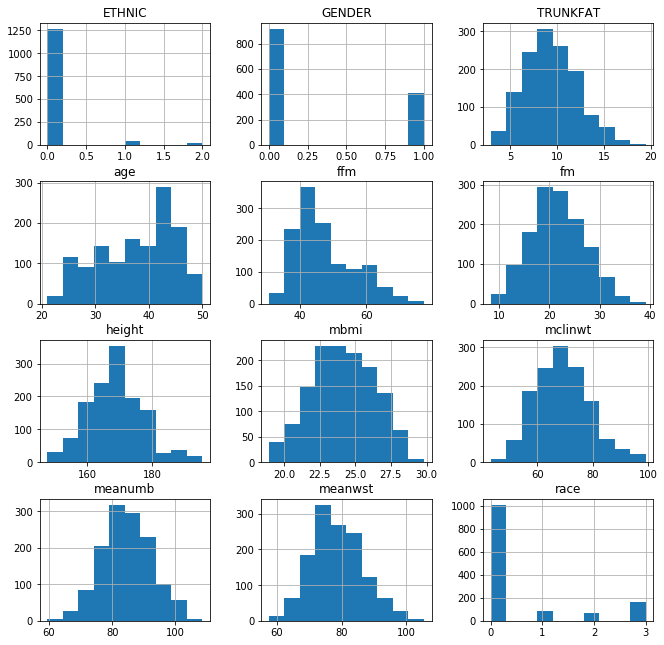

In [68]:
ab[ab.dtypes[(ab.dtypes=="float64")|(ab.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [69]:
from scipy import stats
import sklearn.preprocessing as prp
df=ab

std_scale = prp.StandardScaler().fit(df[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 'GENDER',	'age',	'race','ETHNIC',	'TRUNKFAT',	'fm',	'ffm'	]])
df_std = std_scale.transform(df[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 'GENDER',	'age',	'race','ETHNIC',	'TRUNKFAT',	'fm',	'ffm'	]])
minmax_scale = prp.MinMaxScaler().fit(df[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 'GENDER',	'age',	'race', 'ETHNIC',	'TRUNKFAT',	'fm',	'ffm'	]])
df_minmax = minmax_scale.transform(df[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 'GENDER',	'age',	'race','ETHNIC',	'TRUNKFAT',	'fm',	'ffm'	]])


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


user plot to visualize at exact/standardized/normalized relationships

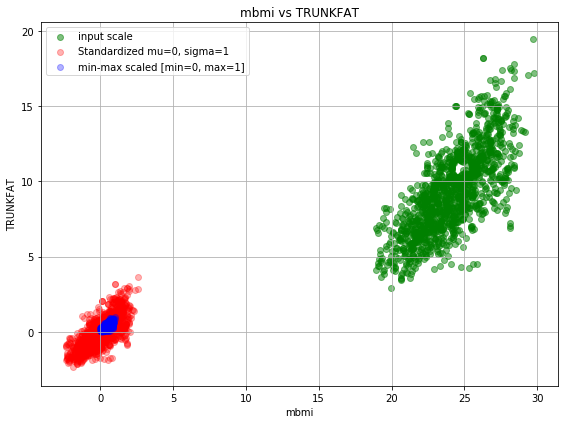

In [70]:
from matplotlib import pyplot as plt

def plot(A,B,x,y): #A,B -> keys; x,y -> index of A,B
    plt.figure(figsize=(8,6))

    plt.scatter(df[A], df[B],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,x], df_std[:,y], color='red',
            label='Standardized mu=0, sigma=1', alpha=0.3)

    plt.scatter(df_minmax[:,x], df_minmax[:,y],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title(f'{A} vs {B}')
    plt.xlabel(A)
    plt.ylabel(B)
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot('mbmi','TRUNKFAT', 2, 9)
plt.show()


In [20]:
dz = df.copy()
dz['TRUNKFAT'],dz['fm'],dz['ffm'] = df_minmax[:,9],df_minmax[:,10],df_minmax[:,11]
dz['mclinwt'],dz['height'],dz['mbmi'] ,dz['meanwst'],dz['meanumb'] ,dz['age']= df_std[:,0],df_std[:,1],df_std[:,2],df_std[:,3],df_std[:,4],df_std[:,6]
dz.head()

,mclinwt,height,mbmi,meanwst,meanumb,GENDER,age,race,ETHNIC,TRUNKFAT,fm,ffm
0,-1.004507,-1.148936,-0.335524,-0.79921,-0.510340,0,-1.490195,0,0,0.269392,0.331101,0.214854
1,-1.004507,-1.148936,-0.335524,-0.79921,-0.510340,0,-1.490195,0,0,0.269392,0.331101,0.214854
2,-1.755932,-2.477331,-0.171149,-0.79921,-0.257665,0,0.580070,1,0,0.302549,0.328796,0.051988
3,-1.750831,-2.477331,-0.160629,-0.79921,0.184516,0,0.580070,1,0,0.309582,0.333041,0.052402
4,-1.761032,-2.477331,-0.181670,-0.79921,-0.699846,0,0.580070,1,0,0.295516,0.324552,0.051575


In [0]:
import numpy as np

dataset = dz.to_numpy()
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


#print(dataset[:1,:])
#X = nrm.normalize(dataset[:,], axis=0)
#Y = nrm.scale(dataset)
#print(Y[:1,:])



In [0]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import tensorflow as tf

np.random.seed(19)

In [73]:
print(dataset.shape)


(1326, 12)


In [74]:
XTRAIN = dataset[:795,0:9]
YTRAIN = dataset[:795,9:]
XVALIDATION = dataset[795:,0:9]
YVALIDATION = dataset[795:,9:]
print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)
print(XTRAIN[0:2,])
print(YTRAIN[0:2])
print(XVALIDATION[0:2,])
print(YVALIDATION[0:2])


(795, 9)
(795, 3)
(531, 9)
(531, 3)
[[-1.00 -1.15 -0.34 -0.80 -0.51 0.00 -1.49 0.00 0.00]
 [-1.00 -1.15 -0.34 -0.80 -0.51 0.00 -1.49 0.00 0.00]]
[[0.27 0.33 0.21]
 [0.27 0.33 0.21]]
[[-1.01 -1.06 -0.45 -0.64 -0.40 0.00 0.58 3.00 0.00]
 [-1.01 -1.06 -0.44 -0.58 -0.45 0.00 0.58 3.00 0.00]]
[[0.34 0.41 0.17]
 [0.34 0.42 0.16]]


In [75]:
model = Sequential()
model.add(Dense(256, input_dim=9, activation='relu'))
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 27        
Total params: 19,555
Trainable params: 19,555
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon() ) )

In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse',r_square])

In [85]:
history = model.fit(XTRAIN, YTRAIN, epochs=32, batch_size=128)

Epoch 1/32
795/795 [==============================] - 0s 48us/step - loss: 0.0011 - mean_squared_error: 0.0011 - r_square: 0.9648
Epoch 2/32
795/795 [==============================] - 0s 35us/step - loss: 0.0011 - mean_squared_error: 0.0011 - r_square: 0.9648
Epoch 3/32
795/795 [==============================] - 0s 35us/step - loss: 0.0011 - mean_squared_error: 0.0011 - r_square: 0.9657
Epoch 4/32
795/795 [==============================] - 0s 36us/step - loss: 0.0012 - mean_squared_error: 0.0012 - r_square: 0.9628
Epoch 5/32
795/795 [==============================] - 0s 44us/step - loss: 0.0012 - mean_squared_error: 0.0012 - r_square: 0.9630
Epoch 6/32
795/795 [==============================] - 0s 35us/step - loss: 0.0011 - mean_squared_error: 0.0011 - r_square: 0.9638
Epoch 7/32
795/795 [==============================] - 0s 36us/step - loss: 0.0011 - mean_squared_error: 0.0011 - r_square: 0.9649   
Epoch 8/32
795/795 [==============================] - 0s 36us/step - loss: 0.0011 - mea

In [86]:
scores = model.evaluate(XTRAIN, YTRAIN)
print(model.metrics_names)
print(scores)
print("\n%s: %.3f" % (model.metrics_names[1], scores[1]))
print('R²: %.2f' % ( scores[2]))


795/795 [==============================] - 0s 50us/step
['loss', 'mean_squared_error', 'r_square']
[0.0010321391888443122, 0.0010321391888443122, 0.9619454946907812]

mean_squared_error: 0.001
R²: 0.96


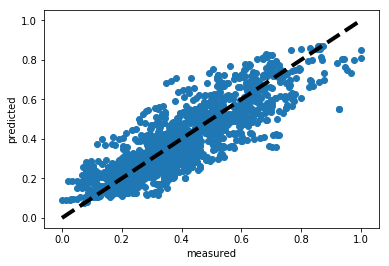

In [87]:
y_pred =model.predict(XVALIDATION)
fig, ax = plt.subplots()
ax.scatter(YVALIDATION, y_pred)
ax.plot([YVALIDATION.min(), YVALIDATION.max()], [YVALIDATION.min(), YVALIDATION.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [88]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print(scores)
print("\n%s: %.3f" % (model.metrics_names[1], scores[1]))
print('R²: %.2f' % ( scores[2]))

531/531 [==============================] - 0s 57us/step
[0.009232096910729246, 0.009232096910729246, 0.7095608655117774]

mean_squared_error: 0.009
R²: 0.71


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()

reg.fit(XTRAIN, YTRAIN)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
y_predicted = reg.predict(XVALIDATION)
print("Mean squared error: %.3f" % mean_squared_error(YVALIDATION, y_predicted))
print('R²: %.2f' % r2_score(YVALIDATION, y_predicted))


Mean squared error: 0.006
R²: 0.82


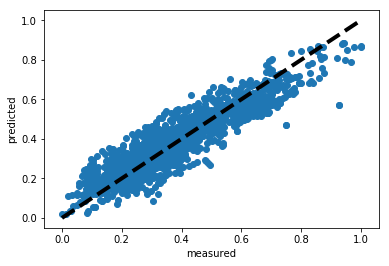

In [84]:
fig, ax = plt.subplots()
ax.scatter(YVALIDATION, y_predicted)
ax.plot([YVALIDATION.min(), YVALIDATION.max()], [YVALIDATION.min(), YVALIDATION.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()